# Titanic Survival Prediction

## 1. Introduction

This notebook is for the **Titanic: Machine Learning from Disaster Kaggle Competition**. My goal is to **predict the survival** from the Titanic shipwreck of the people from the test set using machine learning.

## 2. ML system characteristics

The problem to solve can be described as a **classification** (label data) one. 
The machine learning system is **batch learning** (offline learning) and **supervised** (the training set includes the desired solution). 
I'm going to test the following algorithms: **COMPLETAR**
The metric used is the **accuracy** of predictions, in other words, the percentage of right predictions.
The validation process used is the **K-fold Cross Validation** method, with **COMPLETAR**.

## 3. Data information

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

Both groups have the same columns, that are:

Variable	| Definition |	Key
--- | --- | ---
survival	| Survival |	0 = No, 1 = Yes
pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	
Age	| Age in years	
sibsp	| # of siblings / spouses aboard the Titanic	
parch	| # of parents / children aboard the Titanic	
ticket	| Ticket number	
fare	| Passenger fare	
cabin	| Cabin number	
embarked	| Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton

#### - Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## 4. Data pre-processing

### 4.1. Getting the data

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Getting the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

full_data = [train_df, test_df]

### 4.2. Training set general insights

In [2]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Initial observations of all features characteristics
- 'Survived', 'Sex', and 'Embarked' are categorical;
- 'Pclass' is ordinal;
- 'Age' and 'Fare' are continuous;
- 'SibSp' and 'Parch' are discrete.
- 'Name' is a text feature;
- 'Ticket' and 'Cabin' are alphanumerical features;
- 'Cabin', 'Age' and 'Embarked' have NaN values that needs to be dealt with.

#### Initial ideas of all features characteristics
- Doing some Feature Engineering on the 'Name' and 'Cabin' columns is a promising idea.
    - 'Name' has too many information and can be split into more columns;
    - Analyzing the 'Cabin' column, we can infer that each sample follows the pattern of *Sector* + *Cabin Number*.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000



#### Initial observation of correlation values
It doesn't seem to be two or more numeric features on the same linear space, therefore none of them will be dropped now.

### 4.3. Visualizing and preparing features

#### 4.3.1. PassengerId

I will set is as the index of the dataset.

In [6]:
for df in full_data:
    df.set_index('PassengerId', inplace=True)
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 4.3.2. Pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


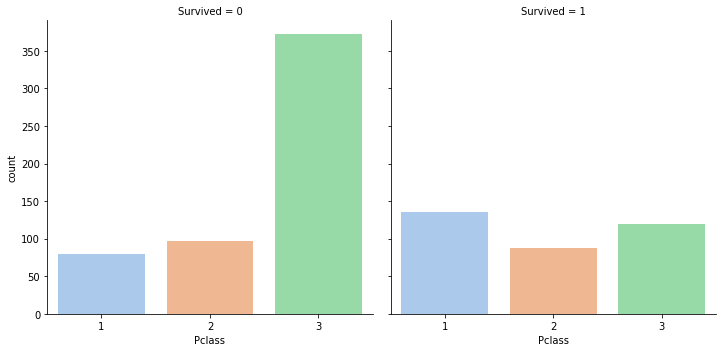

In [7]:
sns.catplot(x="Pclass", col = 'Survived', data=train_df, kind = 'count', palette='pastel')
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

We can see that people that bought **1st class tickets survived the most**, while **3rd class ones survived the least**.

We don't see NaN values in the train_df dataset, but we need to be aware that they can exist in the test_df set. A good way to label a person's class ticket is by knowing how much they paid for it, so I will label using the `Fare` mean for each class as reference.

In [8]:
train_df[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [9]:
for dataset in full_data:
    dataset['Pclass'][(dataset['Pclass'].isna()) & (dataset['Fare'] <= 13.68)] = 3
    dataset['Pclass'][(dataset['Pclass'].isna()) & ((dataset['Fare'] > 13.68) &(dataset['Fare'] <= 20.66))] = 2
    dataset['Pclass'][(dataset['Pclass'].isna()) & (dataset['Fare'] > 20.66)] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### 4.3.3. Name

As observed in 4.2., the `Name` feature informs the Title, the Family Name and the person's actual Name (or in the "Husband's name (person's name)" format). These three informations can be split into 3 different columns by **Feature Engineering** the mother column.

In [10]:
for df in full_data:
    
    df['Name'] = df['Name'].str.replace('.', ',')
    split_name = df['Name'].apply(lambda x: pd.Series(x.split(',')))
    split_name = split_name.apply(lambda x: x.str.strip())

    df['Title']= split_name[1]
    df['Family_Name'] = split_name[0]
    df['Name'] = split_name[2]

- Title

In [11]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Capt              1
Jonkheer          1
Mme               1
Sir               1
Don               1
Ms                1
the Countess      1
Name: Title, dtype: int64

The `Title` feature is categorical, but only four of them has enough data for the category to be relevant, so the next step is to fit the unusual categories to the usual ones. 

The usual categories are 'Mr' and 'Master', for men; and  'Miss' and 'Mrs', for women. With a quick research, I learned that 'Master' is a form of address specific for boys and young men.

In [12]:
train_df[train_df['Title'] == 'Master'].sort_values(by='Age', ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
PassengerId,,,,,,,,,,,,,
126,1,3,Elias,male,12.0,1,0,2651,11.2417,NaN,C,Master,Nicola-Yarred
60,0,3,William Frederick,male,11.0,5,2,CA 2144,46.9000,NaN,S,Master,Goodwin
803,1,1,William Thornton II,male,11.0,1,2,113760,120.0000,B96 B98,S,Master,Carter
820,0,3,Karl Thorsten,male,10.0,3,2,347088,27.9000,NaN,S,Master,Skoog
166,1,3,"Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Master,Goldsmith


The oldest 'Master' passenger is 12 years old, so we will label any men 12 or younger as 'Master', and older as 'Mr'. Since there may be cases that someones age is a NaN value (since this feature hasn't been cleaned yet), I will consider every male person with a NaN age value as a 'Mr'.

In [13]:
usual_titles = ['Mr', 'Miss', 'Mrs', 'Master']
boolean = train_df['Title'].isin(usual_titles) 
train_df[(~boolean) & (train_df['Sex'] == 'female')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Name
PassengerId,,,,,,,,,,,,,
370,1,1,Leontine Pauline,female,24.0,0,0,PC 17477,69.3000,B35,C,Mme,Aubart
444,1,2,Encarnacion,female,28.0,0,0,230434,13.0000,NaN,S,Ms,Reynaldo
557,1,1,"(Lucille Christiana Sutherland) (""Mrs Morgan"")",female,48.0,1,0,11755,39.6000,A16,C,Lady,Duff Gordon
642,1,1,Emma,female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle,Sagesser
711,1,1,"Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C,Mlle,Mayne
760,1,1,of (Lucy Noel Martha Dyer-Edwards),female,33.0,0,0,110152,86.5000,B77,S,the Countess,Rothes
797,1,1,Alice (Farnham),female,49.0,0,0,17465,25.9292,D17,S,Dr,Leader


In [14]:
mrs_with_parenthesis = train_df['Name'][(train_df['Title'] == 'Mrs') & (train_df['Name'].str.contains('\('))].count()
print(mrs_with_parenthesis)
miss_with_parenthesis = train_df['Name'][(train_df['Title'] == 'Miss') & (train_df['Name'].str.contains('\('))].count()
print(miss_with_parenthesis)

121
4


From 125 rows with the 'Mrs' title, 121 of them contains parenthesis in the `Name` column, while with the 'Miss' title, only 4 out of 182. For this reason, the transformation will be based on the presence (or absence) of the parenthesis symbol in the 'Name' column.

In [15]:
for df in full_data:
    
    usual_titles = ['Mr', 'Miss', 'Mrs', 'Master']
    boolean = df['Title'].isin(usual_titles)
    rare_people = df[~boolean].copy()

    rare_people['Title'][(rare_people['Sex'] == 'male') & (rare_people['Age'] <= 12)] = 'Master'
    rare_people['Title'][(rare_people['Sex'] == 'male') & (rare_people['Age'] > 12)] = 'Mr'
    rare_people['Title'][(rare_people['Sex'] == 'male') & (rare_people['Age'].isna())] = 'Mr'
    rare_people['Title'][(rare_people['Sex'] == 'female') & (rare_people['Name'].str.contains("\("))] = 'Mrs'
    rare_people['Title'][(rare_people['Sex'] == 'female') & (~rare_people['Name'].str.contains("\("))] = 'Miss'
    df[~boolean] = rare_people
    
train_df['Title'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is tryi

Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64

#### 4.3.4. Sex

,Survived
Sex,
female,0.742038
male,0.188908


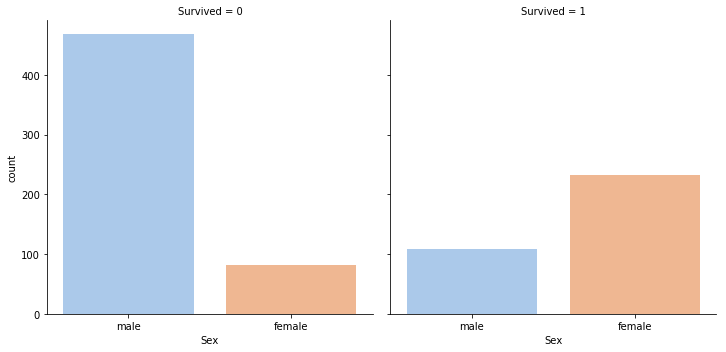

In [16]:
sns.catplot(x="Sex", col = 'Survived', data=train_df, kind = 'count', palette='pastel')
train_df[['Sex', 'Survived']].groupby('Sex').mean()

The `Sex` feature shows itself as an **very** promising feature, since more than 74% of all women at Titanic survived, while only 18% of men did.

- Dummy Encoding

To be able to use this column in algorithms that only use numeric numeric feature, a new `Is Female` column will be created, informing if the person is female (value 1) or if the person isn't (therefore is male, value 0). Then, the `Sex` column will be dropped.

In [17]:
for df in full_data:
    
    is_female = df['Sex'].replace('male', '0').replace('female', '1').astype(int)
    df['Is_Female'] = is_female
    df.drop('Sex', axis=1, inplace=True)

#### 4.3.5. Age

There are more than 250 entries of NaN values on the 'Age' column. At first, a reasonable idea would be replace them with the average age from all the others passengers, but after feature engineering the `Name` column, the newly created `Title` column shows as a better option for a better estimate.

In [18]:
train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.984412
3,Mrs,35.991071


In [19]:
for df in full_data:

    df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'), inplace=True)

- Feature Engineering

A promising idea is to create age categories. I will do so with the following categories:

    - Up to 12 y/o: Child
    - 12 to 18 y/o: Teenager
    - 18 to 60 y/o: Adult
    - more than 60 y/o: Elder

In [20]:
for df in full_data:
    category = pd.cut(df.Age,bins=[0, 2, 17, 65, 99],labels=['Baby','Child','Adult','Elderly'])
    df['Age_Group'] = category

In [21]:
train_df['Age_Group'].value_counts()

Adult      766
Child       93
Baby        24
Elderly      8
Name: Age_Group, dtype: int64

In [22]:
train_df[['Age_Group', 'Survived']].groupby('Age_Group').mean()

,Survived
Age_Group,
Baby,0.625000
Child,0.516129
Adult,0.362924
Elderly,0.125000


Even though the 'Baby' and the 'Elderly' categories have very few representatives, we can observe that the rule of thumb is that, the older the person, the less likely for him/her to survive the shipwreck.

#### 4.3.6. SibSp and Parch

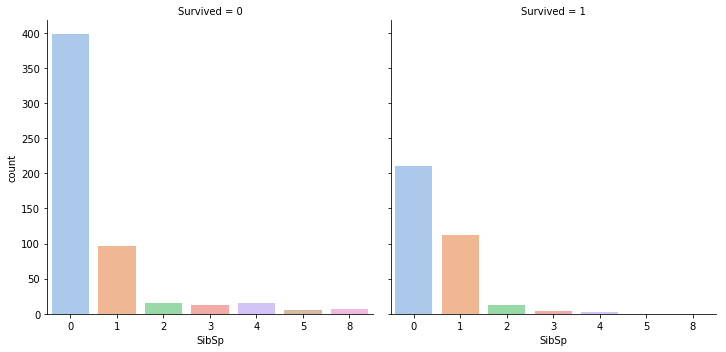

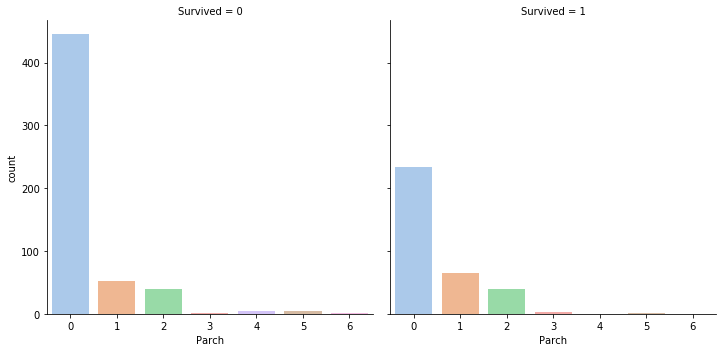

In [23]:
sns.catplot(x="SibSp", col = 'Survived', data=train_df, kind = 'count', palette='pastel')
sns.catplot(x="Parch", col = 'Survived', data=train_df, kind = 'count', palette='pastel')
plt.show()

- Feature Engineering
Because these two columns describe family relationship (only differing from each other on the kind of kinship), it seems wise to create a new `Family` column. I will do so by summing the `SibSp` and `Parch` columns.

In [24]:
for df in full_data:
    family = df['Parch'] + df['SibSp']
    df['Family'] = family

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


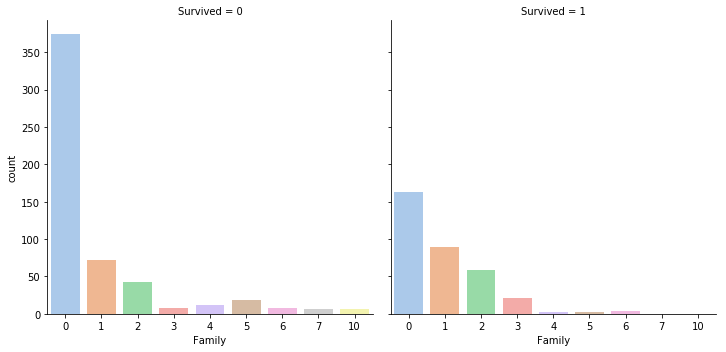

In [25]:
sns.catplot(x="Family", col = 'Survived', data=train_df, kind = 'count', palette='pastel')
train_df[['Family', 'Survived']].groupby('Family').mean()

In [26]:
train_df['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

We can see that the mean survivality of people who had family members on board of Titanic were is higher than to those who were alone. Because each number of family members above 2 has very few representatives, I will create the binary `Has Family` column.

In [27]:
for df in full_data:
    has_family = df['Family'].replace([2,3,4,5,6,7,8,9,10], 1)
    df['Has_Family'] = has_family

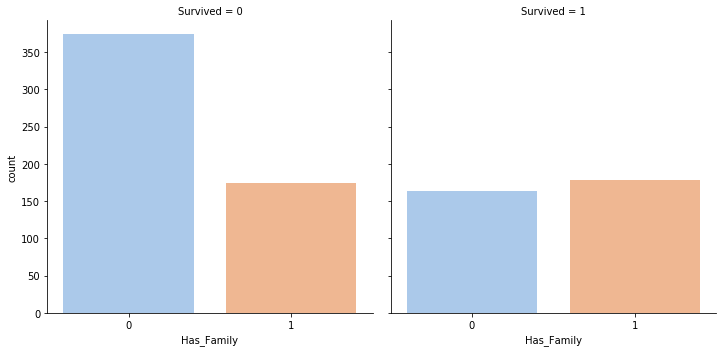

In [28]:
sns.catplot(x="Has_Family", col = 'Survived', data=train_df, kind = 'count', palette='pastel')

We can drop the `SibSp`, `Parch` and `Family` columns now.

In [29]:
for df in full_data:
    df.drop(['SibSp', 'Parch', 'Family'], axis=1, inplace=True)

#### 4.3.7. Ticket

Since I didn't find any way of using this column to contribute to the predictions, I will drop it entirely.

In [30]:
for df in full_data:
    df.drop('Ticket', axis=1, inplace=True)

#### 4.3.8. Fare

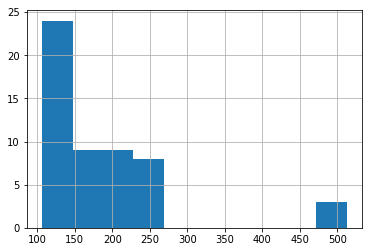

In [31]:
train_df[train_df['Fare'] > 100]['Fare'].hist()

In [32]:
train_df[train_df['Fare'] > 250]

,Survived,Pclass,Name,Age,Fare,Cabin,Embarked,Title,Family_Name,Is_Female,Age_Group,Has_Family
PassengerId,,,,,,,,,,,,
28,0,1,Charles Alexander,19.0,263.0000,C23 C25 C27,S,Mr,Fortune,0,Adult,1
89,1,1,Mabel Helen,23.0,263.0000,C23 C25 C27,S,Miss,Fortune,1,Adult,1
259,1,1,Anna,35.0,512.3292,NaN,C,Miss,Ward,1,Adult,0
312,1,1,Emily Borie,18.0,262.3750,B57 B59 B63 B66,C,Miss,Ryerson,1,Adult,1
342,1,1,Alice Elizabeth,24.0,263.0000,C23 C25 C27,S,Miss,Fortune,1,Adult,1
439,0,1,Mark,64.0,263.0000,C23 C25 C27,S,Mr,Fortune,0,Adult,1
680,1,1,Thomas Drake Martinez,36.0,512.3292,B51 B53 B55,C,Mr,Cardeza,0,Adult,1
738,1,1,Gustave J,35.0,512.3292,B101,C,Mr,Lesurer,0,Adult,0
743,1,1,"Susan Parker ""Suzette""",21.0,262.3750,B57 B59 B63 B66,C,Miss,Ryerson,1,Adult,1


The 'Fare' feature is left skewed and it seems wise to fix the 3 outliers of the former. 

In [33]:
for df in full_data:
    df['Fare'] = np.where(df['Fare'] > 263, 263, df['Fare'])

train_df[train_df['Fare'] > 250]

,Survived,Pclass,Name,Age,Fare,Cabin,Embarked,Title,Family_Name,Is_Female,Age_Group,Has_Family
PassengerId,,,,,,,,,,,,
28,0,1,Charles Alexander,19.0,263.000,C23 C25 C27,S,Mr,Fortune,0,Adult,1
89,1,1,Mabel Helen,23.0,263.000,C23 C25 C27,S,Miss,Fortune,1,Adult,1
259,1,1,Anna,35.0,263.000,NaN,C,Miss,Ward,1,Adult,0
312,1,1,Emily Borie,18.0,262.375,B57 B59 B63 B66,C,Miss,Ryerson,1,Adult,1
342,1,1,Alice Elizabeth,24.0,263.000,C23 C25 C27,S,Miss,Fortune,1,Adult,1
439,0,1,Mark,64.0,263.000,C23 C25 C27,S,Mr,Fortune,0,Adult,1
680,1,1,Thomas Drake Martinez,36.0,263.000,B51 B53 B55,C,Mr,Cardeza,0,Adult,1
738,1,1,Gustave J,35.0,263.000,B101,C,Mr,Lesurer,0,Adult,0
743,1,1,"Susan Parker ""Suzette""",21.0,262.375,B57 B59 B63 B66,C,Miss,Ryerson,1,Adult,1


- Dealing with NaN values

Even though the training set doesn't have NaN values in this column, the test set may do. For this reason, I will fill it with the mean value.

In [34]:
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

#### 4.3.9. Cabin

We already know that, out of 891 entries, only 204 of them are non-null values for this feature, which strongly suggests it's wise to drop the column. Before we decide what to do with these values, we should understand more what is happening.

In [35]:
print(train_df[train_df['Cabin'].isna()]['Survived'].mean())
print(train_df[train_df['Cabin'].notna()]['Survived'].mean())

0.29985443959243085
0.6666666666666666


We can see that knowing someone's cabin is a strong indicator of survivality (over 30% more people that survived compared to those that we don't know the cabin). Therefore, we won't simply drop the 'Cabin' column (even though it has over than 50% of NaN values), but simply rename them to Unknown.

In [36]:
for df in full_data:
    df['Cabin'] = df['Cabin'].fillna('Unknown')

- Feature Engineering

In [37]:
train_df['Cabin'].value_counts().head()

Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: Cabin, dtype: int64

A good idea is to split the 'Cabin' feature into two, one of them describing the cabin type/sector, and the other one its number. By doing this, we can try to analyse each sector separetaly.

There are a few 'Cabin' cells that does not refer to a single cabin, but to more than one instead. In these cases, we will delete the non-numerical values from the newly created 'Cabin Number' column.

In [38]:
for df in full_data:

    cabin_sector = df['Cabin'].str[0]
    df['Cabin_Sector'] = cabin_sector
    df['Cabin_Sector'] = df['Cabin_Sector'].replace('U', 'Unknown')

    cabin_number = df['Cabin'].str[1:]
    df['Cabin_Number'] = cabin_number
    df['Cabin_Number'] = df['Cabin_Number'].replace('nknown', 'Unknown')

    df[['Cabin', 'Cabin_Number', 'Cabin_Sector']] = df[['Cabin', 'Cabin_Number', 'Cabin_Sector']].apply(lambda x: x.str.strip())

In [39]:
train_df['Cabin_Sector'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin_Sector, dtype: int64

In [40]:
train_df[["Cabin_Sector", "Survived"]].groupby(['Cabin_Sector'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin_Sector,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,Unknown,0.299854
7,T,0.000000


Not only the vast majority of passengers has unknown `Cabin Sector`, but the ones that are known are more likely to survive. I will keep the column as it is now, and drop the `Cabin` and the recently created `Cabin Number` columns, since no real pattern was noticed.

In [41]:
for df in full_data:
    df.drop(['Cabin', 'Cabin_Number'], axis=1, inplace=True)

#### 4.3.10. Embarked

In [42]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


While the vast majority of passengers embarked in Southhampton, the ones that did it at Cherbourg had way higher survivality, more than 15% above the other embarking places.

- Dealing with NaN values

Since there are just 2 NaN values, I'm gonna replace them with S, the most common value.

In [44]:
for df in full_data:
    df['Embarked'].fillna('S', inplace=True)

In [45]:
train_df.head()

,Survived,Pclass,Name,Age,Fare,Embarked,Title,Family_Name,Is_Female,Age_Group,Has_Family,Cabin_Sector
PassengerId,,,,,,,,,,,,
1,0,3,Owen Harris,22.0,7.2500,S,Mr,Braund,0,Adult,1,Unknown
2,1,1,John Bradley (Florence Briggs Thayer),38.0,71.2833,C,Mrs,Cumings,1,Adult,1,C
3,1,3,Laina,26.0,7.9250,S,Miss,Heikkinen,1,Adult,0,Unknown
4,1,1,Jacques Heath (Lily May Peel),35.0,53.1000,S,Mrs,Futrelle,1,Adult,1,C
5,0,3,William Henry,35.0,8.0500,S,Mr,Allen,0,Adult,0,Unknown


### 4.4. One-Hot Encoding Categorical Features and Dropping Features

Now that all features have been cleaned and some visualizations made, I will use one-hot encoding on all categorical features, since most machine learning algorithms prefer numerical data. The reason I didn't do it earlier feature by feature is that it would make some processes harder.

The categorical features to be one-hot encoded are `Pclass`, `Title`, `Age Group`, `Cabin Sector` and `Embarked`.
After the process is done, I will drop the original and the `Family Name` and `Name` features, since they won't be of any use to the models.

In [46]:
to_drop = ['Family_Name', 'Name']

train_df = pd.get_dummies(train_df, columns=['Pclass', 'Title', 'Age_Group', 'Cabin_Sector', 'Embarked'])
train_df.drop(to_drop, axis=1, inplace=True)

test_df = pd.get_dummies(test_df, columns=['Pclass', 'Title', 'Age_Group', 'Cabin_Sector', 'Embarked'])
test_df.drop(to_drop, axis=1, inplace=True)

train_df.head(5)

,Survived,Age,Fare,Is_Female,Has_Family,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,...,Cabin_Sector_C,Cabin_Sector_D,Cabin_Sector_E,Cabin_Sector_F,Cabin_Sector_G,Cabin_Sector_T,Cabin_Sector_Unknown,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,38.0,71.2833,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,35.0,53.1000,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,35.0,8.0500,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


### 4.5. Checking corresponding columns

In [47]:
print(train_df.drop('Survived', axis=1).columns)

print(test_df.columns)

Index(['Age', 'Fare', 'Is_Female', 'Has_Family', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Age_Group_Baby', 'Age_Group_Child', 'Age_Group_Adult',
       'Age_Group_Elderly', 'Cabin_Sector_A', 'Cabin_Sector_B',
       'Cabin_Sector_C', 'Cabin_Sector_D', 'Cabin_Sector_E', 'Cabin_Sector_F',
       'Cabin_Sector_G', 'Cabin_Sector_T', 'Cabin_Sector_Unknown',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['Age', 'Fare', 'Is_Female', 'Has_Family', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Age_Group_Baby', 'Age_Group_Child', 'Age_Group_Adult',
       'Age_Group_Elderly', 'Cabin_Sector_A', 'Cabin_Sector_B',
       'Cabin_Sector_C', 'Cabin_Sector_D', 'Cabin_Sector_E', 'Cabin_Sector_F',
       'Cabin_Sector_G', 'Cabin_Sector_Unknown', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


We can see that the test dataset doesn't possess any Cabin_Sector_T passenger, so to maintain the match of the datasets, I will insert this column to the dataset with the values of 0.

In [48]:
test_df.insert(22, 'Cabin_Sector_T', 0)

### 4.6. Feature Scaling

The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance, and to do so, I will use the **Min-max normalization** method.

In [49]:
from sklearn.preprocessing import MinMaxScaler

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_test = test_df

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

## 5. Modeling

In the modeling process, I will test 4 different algorithms and pick the best out of those to tune it further.
These test will be carried out using **Feature Selection** based on **feature importance**, and the results will be based on the **K-Fold cross validation** accuracy, using 5 folds.

### 5.1. Different algorithms testing

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

all_algorithms = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42), 
                  LinearSVC(random_state=42), DecisionTreeClassifier(random_state=42)]

all_scores = []

for alg in all_algorithms:
    selector = SelectFromModel(alg).fit(X_scaled,y)
    X_selec = selector.transform(X_scaled)
    score = cross_val_score(alg, X_selec, y, cv=5, scoring='accuracy').mean()
    all_scores.append(score)
    
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machines', 'Decision Tree'],
    'Score': all_scores})

results.sort_values('Score', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Model,Score
1,Random Forest,0.812608
0,Logistic Regression,0.809250
2,Support Vector Machines,0.795742
3,Decision Tree,0.765530


In [51]:
selector = SelectFromModel(RandomForestClassifier(random_state=42)).fit(X_scaled,y)
X.columns[selector.get_support()]

Index(['Age', 'Fare', 'Is_Female', 'Pclass_3', 'Title_Miss', 'Title_Mr',
       'Cabin_Sector_Unknown'],
      dtype='object')

The Random Forest algorithms had the best score, with 0.812 accuracy. The features selected by the 'SelectFromModel' class were: `Age`, `Fare`, `Is_Female`, `Pclass_3`, `Title_Miss`, `Title_Mr`, `Cabin_Sector_Unknown`.

## 5.2. Random Forest Model Tuning

For the model tuning, I will use **Grid Search Cross Validation**.

In [52]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_estimators' : [15, 100, 200],
                  'criterion' : ['gini', 'entropy'],
                  'max_features' : ['auto', 'sqrt', 'log2', None],
                  'random_state' : [42],
                  'max_depth' : [None, 50],
                  'min_samples_split' : [7, 11],
                  'min_weight_fraction_leaf' : [0.0, 0.2],
                  'max_leaf_nodes' : [18, 20]
                 }

selector = SelectFromModel(RandomForestClassifier(random_state=42)).fit(X_scaled,y)
X_selec = selector.transform(X_scaled)

grid_search_rf = GridSearchCV(estimator = RandomForestClassifier(), scoring='accuracy', param_grid=parameter_grid, cv=5)
grid_search_rf.fit(X_selec,y)
print('Best score: {}'.format(grid_search_rf.best_score_))
print('Best parameters: {}'.format(grid_search_rf.best_params_))

Best score: 0.8406285072951739
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 18, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42}


The model tuning using 'GridSearchCV' **improved accuracy in almost 3%**, and this is my **final model**.

In [53]:
final_model = RandomForestClassifier(criterion='gini', 
                                     max_depth=None,
                                     max_features=None, 
                                     max_leaf_nodes=18, 
                                     min_samples_split=7, 
                                     min_weight_fraction_leaf=0.0, 
                                     n_estimators=100, 
                                     random_state=42)
final_model.fit(X_selec, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=18,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## 6. Predicting the test dataset survival and submitting to Kaggle

In [54]:
X_test_selec = selector.transform(X_test) 

y_test = final_model.predict(X_test_selec)

submit_df = pd.DataFrame({
        'PassengerId': test_df.index,
        'Survived': y_test
    })

submit_df.to_csv('submit_df.csv', index=False)

My score on Kaggle is an **accuracy of 78.468%** in predicting survivality on Titanic, which is a good score without cheating with extra information. My main focus was to practice my skills and improve my knowledge on data science and feature engineering, and I think I had success doing so.

## 7. Next steps

The main next step to be done is to improve the storytelling of the project, specially on the Modeling stage, writing more clearly and showing more visualizations. A good improvement would be a reorganization of the project's ordering, creating a clear pipeline. Explore a bigger variety of algorithms would be great too.